# Loan Status Prediction using Decision Trees
The Loan Status Dataset is a dataset commonly used to analyze and predict the outcomes of loan applications. It contains information about borrowers and their loans, including details about the applicant's financial status, credit history, loan purpose, and demographic information. The dataset is particularly useful for solving binary or multi-class classification problems, such as predicting whether a loan will be approved, repaid, or defaulted.

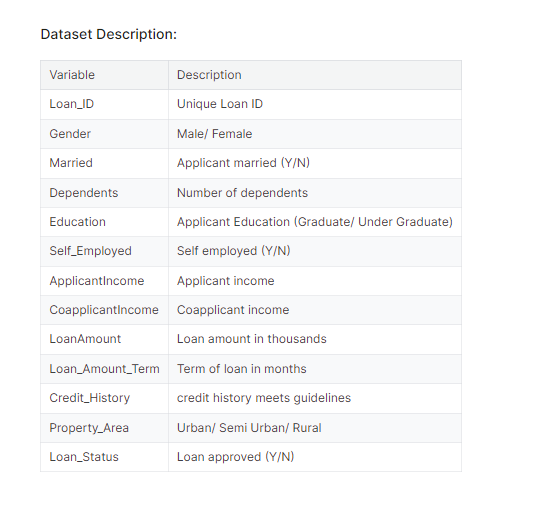

### Import Necessary Libraries

In [5]:
# Data manipulation libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Step 1: Load the Dataset

In [7]:
train_df = pd.read_csv('Loan_Train_Dataset.csv')

In [8]:
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### 

## Step 2: Exploratory Data Analysis (EDA)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
train_df.sample(2).T

,321,50
Loan_ID,LP002053,LP001155
Gender,Male,Female
Married,Yes,Yes
Dependents,3+,0
Education,Graduate,Not Graduate
Self_Employed,No,No
ApplicantIncome,4342,1928
CoapplicantIncome,189.0,1644.0
LoanAmount,124.0,100.0
Loan_Amount_Term,360.0,360.0


## Missing data

In [15]:
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
train_df.isna().sum()/len(train_df)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

#### Drop the missing data for this use-case

In [18]:
train_df.dropna(inplace=True)

In [19]:
train_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Visualization

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

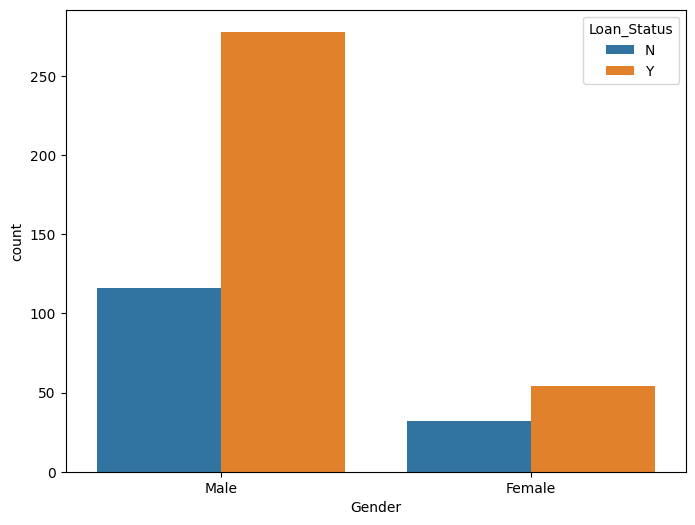

In [23]:
plt.subplots(figsize=(8,6))
sns.countplot(x=train_df['Gender'], hue=train_df['Loan_Status'])
plt.show()

In [24]:
train_df.groupby('Gender').agg(Count_Application = ('Loan_ID', 'nunique')).reset_index()

,Gender,Count_Application
0,Female,86
1,Male,394


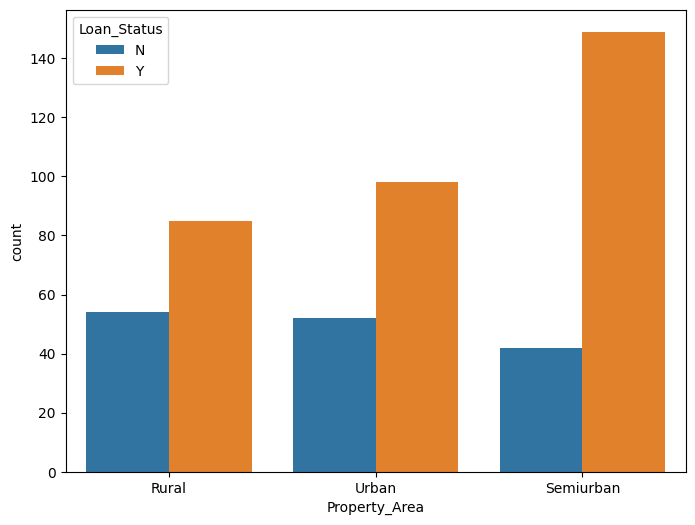

In [25]:
plt.subplots(figsize=(8,6))
sns.countplot(x=train_df['Property_Area'], hue=train_df['Loan_Status'])
plt.show()

- More applicants are from Semi-urban area and their loan aproval numbers are likely to be higher

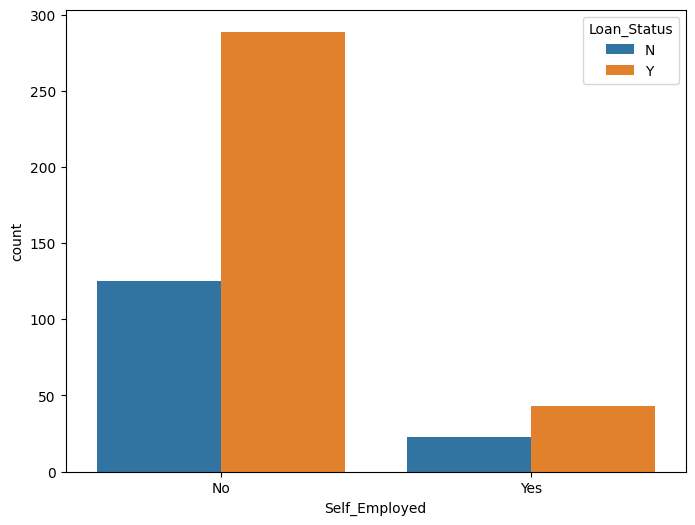

In [27]:
plt.subplots(figsize=(8,6))
sns.countplot(x=train_df['Self_Employed'], hue=train_df['Loan_Status'])
plt.show()

- Number of Loan application and approval is the highest for the salaried folks.

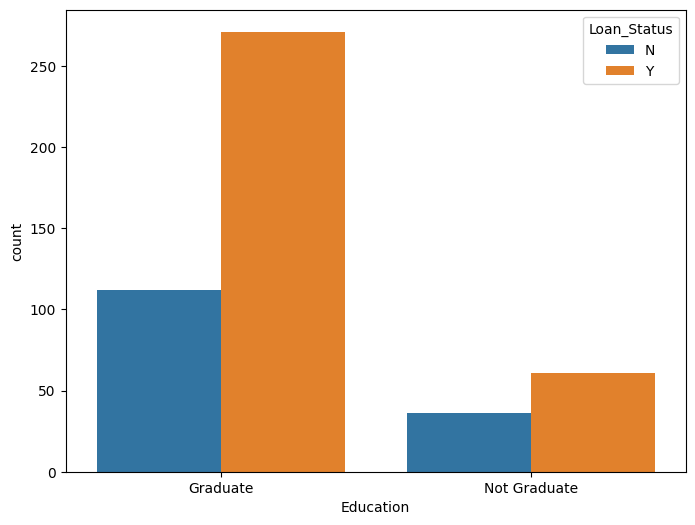

In [29]:
plt.subplots(figsize=(8,6))
sns.countplot(x=train_df['Education'], hue=train_df['Loan_Status'])
plt.show()

- Graduates have a higher loan approval rate compared to non-graduates, indicating that education level plays a significant role in loan approval decisions.

### Correlation matrix

In [32]:
train_df.corr(numeric_only=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000


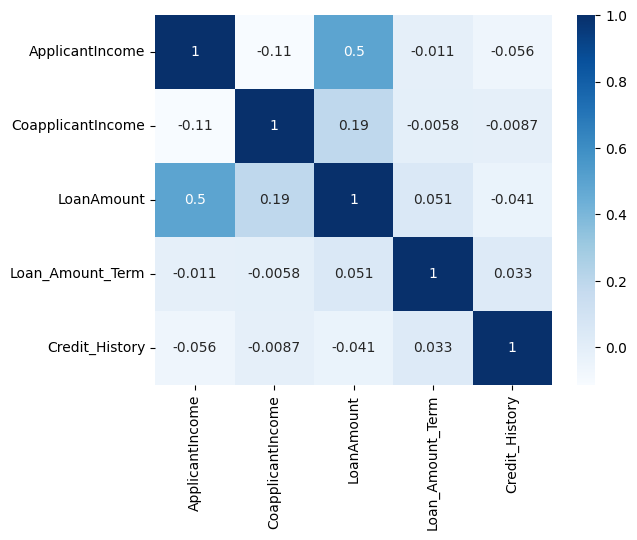

In [33]:
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

- Key takeaway: Applicant incomes seems to be `moderately` correlated with the `loan amount`

## Step 3: Model Building

In [36]:
# Machine Learning Libraries
from sklearn.model_selection import train_test_split #training and testing dataset split
from sklearn.preprocessing import StandardScaler #Standardizing the data (x-mean)/std. deviation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report

### Prepare the Data

In [38]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [39]:
select_cols = [ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

#### Encoding categorical features

In [41]:
train_df_encoded = pd.get_dummies(train_df[select_cols], drop_first=True)

In [42]:
train_df_encoded.sample(2).T

,476,350
ApplicantIncome,6700,9083
CoapplicantIncome,1750.0,0.0
LoanAmount,230.0,228.0
Loan_Amount_Term,300.0,360.0
Credit_History,1.0,1.0
Gender_Male,True,True
Married_Yes,True,True
Dependents_1,False,False
Dependents_2,True,False
Dependents_3+,False,False


In [43]:
X = train_df_encoded

In [44]:
X.sample(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
469,4333,2451.0,110.0,360.0,1.0,True,True,False,False,False,False,False,False,True
147,1538,1425.0,30.0,360.0,1.0,True,True,True,False,False,False,False,False,True


In [45]:
X['Gender_Male'].value_counts()

Gender_Male
True     394
False     86
Name: count, dtype: int64

In [46]:
train_df['Gender'].value_counts()

Gender
Male      394
Female     86
Name: count, dtype: int64

In [47]:
y=train_df['Loan_Status']

In [48]:
y.sample(2)

541    N
537    Y
Name: Loan_Status, dtype: object

### Split the data into train and test sets

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20, random_state=42)

In [51]:
X_train.shape

(384, 14)

In [52]:
X_test.shape

(96, 14)

## Model-1

In [54]:
tree_mod_1 = DecisionTreeClassifier() # base model is generally run with the deafault settings

In [55]:
tree_mod_1

DecisionTreeClassifier()

In [56]:
tree_mod_1.fit(X_train, y_train) #training the model

DecisionTreeClassifier()

### Predict the test dataset 

In [58]:
X_test.T

,92,529,505,358,512,220,347,482,97,566,...,410,70,446,269,554,281,299,522,33,537
ApplicantIncome,3273,6783,3510,3000,3283,2221,3083,2083,1977,3333,...,3867,3208,4652,2876,3593,3927,2014,5677,3500,3617
CoapplicantIncome,1820.0,0.0,4416.0,1666.0,2035.0,0.0,2168.0,3150.0,997.0,0.0,...,0.0,3066.0,0.0,1560.0,4266.0,800.0,2925.0,1424.0,1667.0,0.0
LoanAmount,81.0,130.0,243.0,100.0,148.0,60.0,126.0,128.0,50.0,70.0,...,62.0,172.0,110.0,90.0,132.0,112.0,113.0,100.0,114.0,107.0
Loan_Amount_Term,360.0,360.0,360.0,480.0,360.0,360.0,360.0,360.0,360.0,360.0,...,360.0,360.0,360.0,360.0,180.0,360.0,360.0,360.0,360.0,360.0
Credit_History,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Gender_Male,True,True,True,True,True,True,True,True,True,True,...,False,True,True,False,True,True,True,True,True,True
Married_Yes,True,False,True,True,True,True,True,True,True,False,...,False,True,True,False,True,True,True,True,True,False
Dependents_1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,False
Dependents_2,True,False,True,False,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
Dependents_3+,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [59]:
pred_values = tree_mod_1.predict(X_test)

In [60]:
pred_values

array(['Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y'], dtype=object)

## Step 4: Evaluating the Model

### Performance Metrics

In [135]:
print('Validation Accuracy', accuracy_score(y_test, pred_values)*100)

Validation Accuracy 72.91666666666666


In [166]:
clrep = classification_report(y_test,pred_values)
print(clrep)

              precision    recall  f1-score   support

           N       0.53      0.57      0.55        28
           Y       0.82      0.79      0.81        68

    accuracy                           0.73        96
   macro avg       0.68      0.68      0.68        96
weighted avg       0.74      0.73      0.73        96



### Plotting Confusion Matrix

In [138]:
from sklearn.metrics import confusion_matrix

In [140]:
cm = confusion_matrix(y_test, pred_values)

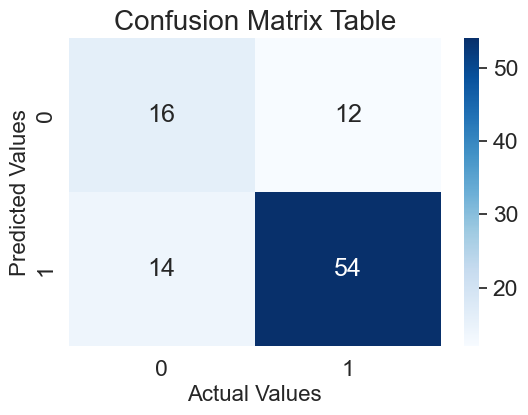

In [142]:
plt.subplots(figsize = (6,4))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Table", fontsize=20)
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)

plt.show()

## Let us create a separate model for K-fold CV

## Model-2 using Hyperparameter Tuning

In [146]:
from sklearn.model_selection import GridSearchCV

In [148]:
### Initialize the DT classifier
tree_mod_hpt = DecisionTreeClassifier()

In [150]:
### Define the hyperparameters
hpt_grid = {
    'max_depth':[None, 3, 5, 10, 20], 
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]    
}

In [152]:
grid_search = GridSearchCV(estimator=tree_mod_hpt, param_grid=hpt_grid, cv=5, scoring='accuracy')
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [153]:
### Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [156]:
### Get the best mean CV score
best_score = grid_search.best_score_
print("Best Mean CV Score:", best_score*100)

Best Mean CV Score: 79.375


In [158]:
best_model = grid_search.best_estimator_

In [160]:
y_pred = best_model.predict(X_test)

In [162]:
from sklearn.metrics import classification_report

In [164]:
clrep = classification_report(y_test,y_pred)
print(clrep)

              precision    recall  f1-score   support

           N       1.00      0.43      0.60        28
           Y       0.81      1.00      0.89        68

    accuracy                           0.83        96
   macro avg       0.90      0.71      0.75        96
weighted avg       0.87      0.83      0.81        96



### Plotting Confusion Matrix

In [168]:
cm = confusion_matrix(y_test, y_pred)

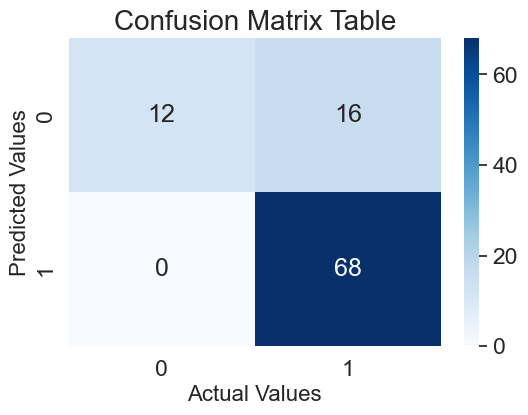

In [170]:
plt.subplots(figsize = (6,4))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Table", fontsize=20)
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)

plt.show()

# Conclusion
- The model demonstrates strong performance with an overall accuracy of 83% and excellent results for class Y (loan approved), achieving an F1-score of 0.89 and perfect recall (1.00).
- This indicates the model is highly effective at identifying approved loans, which is crucial for minimizing missed opportunities.
- While there is room for improvement in identifying class N (loan not approved), the results show the model is a solid foundation for building a reliable loan status prediction system. With minor adjustments, its performance can be further enhanced to balance predictions effectively.